# №8 Астронавты (космонавты)

In [261]:
import pandas as pd
import scipy.stats as stats
%matplotlib inline
df = pd.read_csv('astronauts.csv')
df

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
5,Andrew M. Allen,1987.0,12.0,Retired,8/4/1955,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN
6,Joseph P. Allen,1967.0,6.0,Retired,6/27/1937,"Crawsfordsville, IN",Male,DePauw University; Yale University,Mathematics & Physics,Physics,NaN,NaN,2,313,2,12.0,"ST-5 (Columbia), STS 51-A (Discovery)",NaN,NaN
7,Scott D. Altman,1995.0,15.0,Retired,8/15/1959,"Lincoln, IL",Male,University of Illinois; US Naval Postgraduate ...,Aeronautical & Astronautical Engineering,Aeronautical Engineering,Captain,US Navy (Retired),4,1236,0,0.0,"STS-90 (Columbia), STS-106 (Atlantis), STS-109...",NaN,NaN
8,William A. Anders,1963.0,3.0,Retired,10/17/1933,Hong Kong,Male,US Naval Academy; Air Force Institute of Techn...,Nuclear Engineering,Nuclear Engineering,Major General,US Air Force Reserves (Retired),1,147,0,0.0,Apollo 8,NaN,NaN
9,Clayton C. Anderson,1998.0,17.0,Retired,2/23/1959,"Omaha, NE",Male,Hastings College; Iowa State University,Physics,Aerospace Engineering,NaN,NaN,2,4005,6,38.0,"STS-117/120 (Atlantis/Discovery), STS-131 (Dis...",NaN,NaN


## 1.1 Определите астронавта из США, который провёл наибольшее количество времени в открытом космосе.

In [262]:
def isUSACitizen(bp):
    try:
        return bp.split(', ')[1].__len__() == 2
    except IndexError:
        return False

df.iloc[df[df['Birth Place'].apply(lambda bp: isUSACitizen(bp))]['Space Walks (hr)'].idxmax()]['Name']

'John M. Grunsfeld'

## 1.2 Постройте график, на котором по оси OX отображены астронавты, а по оси OY – время, которое они провели в открытом космосе.

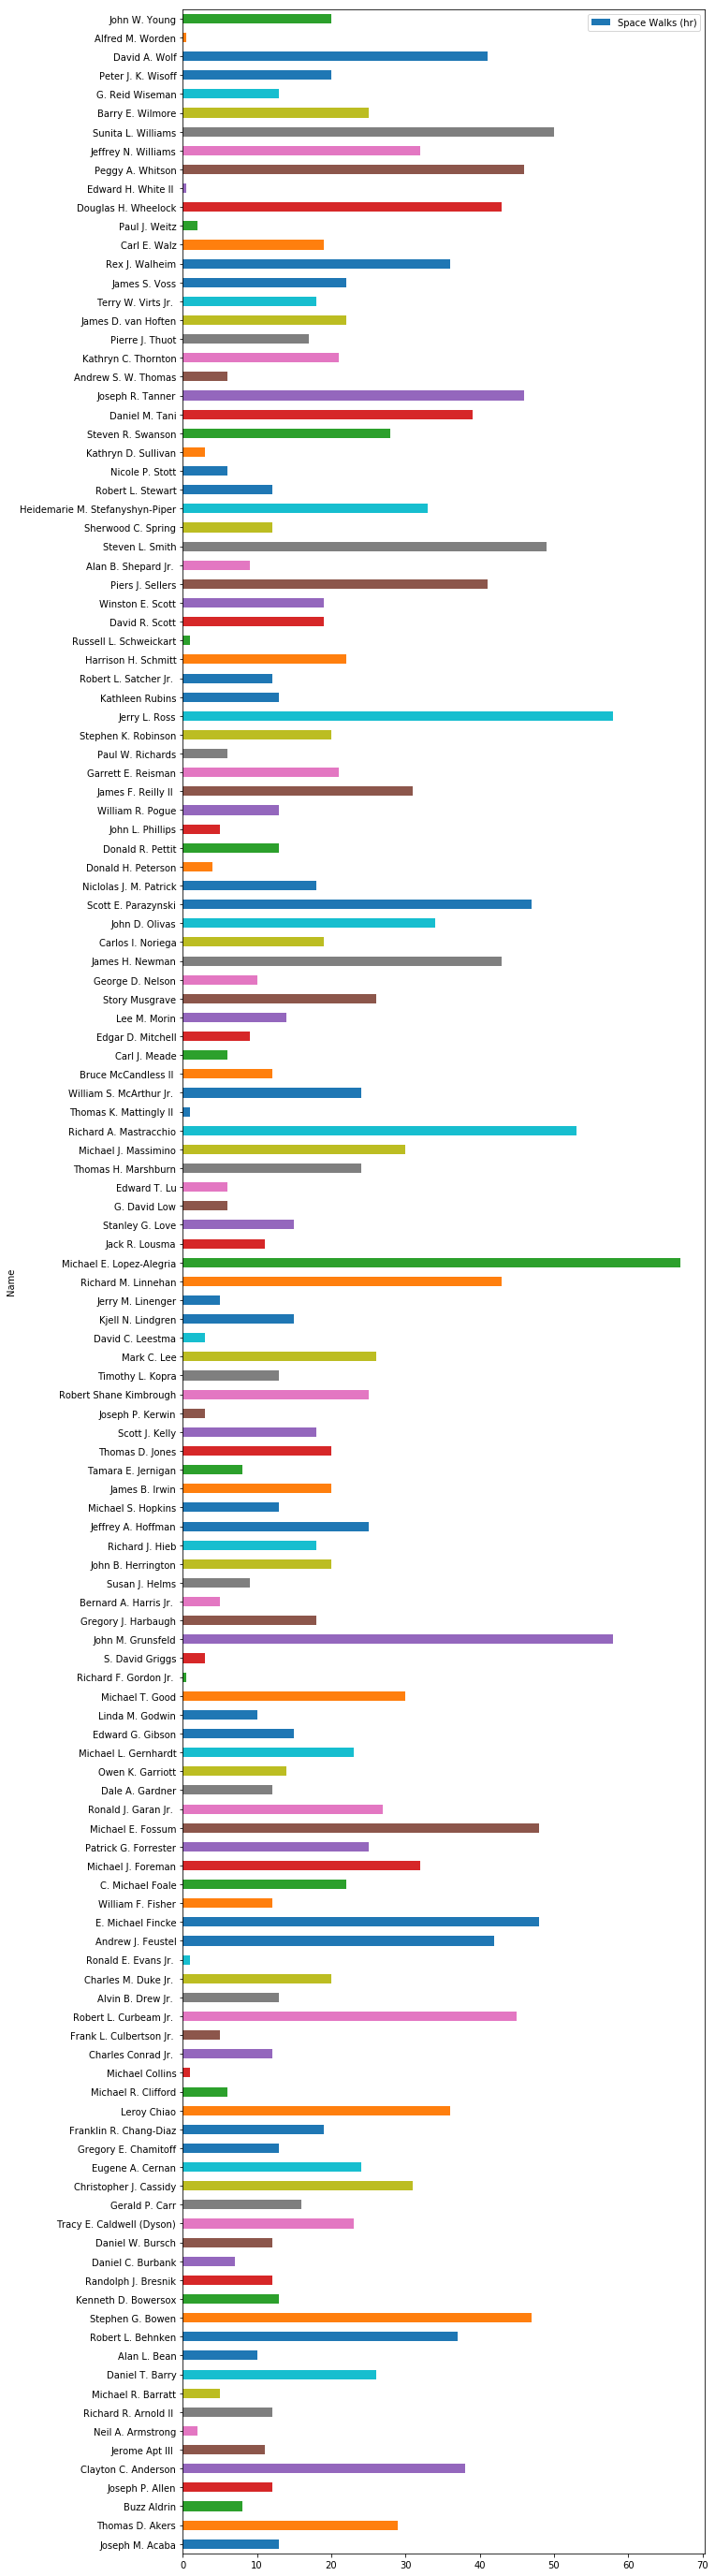

In [263]:
df[df['Space Walks (hr)'] > 0].plot(x = 'Name', y = 'Space Walks (hr)', kind = 'barh', figsize = (10, 50))

## 2.1 Укажите университет, выпустивший наибольшее количество астронавтов.

In [264]:
df['Alma Mater'].str.split('; ', expand=True).stack().value_counts().idxmax()

'US Naval Academy'

## 2.2 Постройте график, на котором по оси OX отображены университеты, а по оси OY – количество астронавтов, которое учились в данном университете.

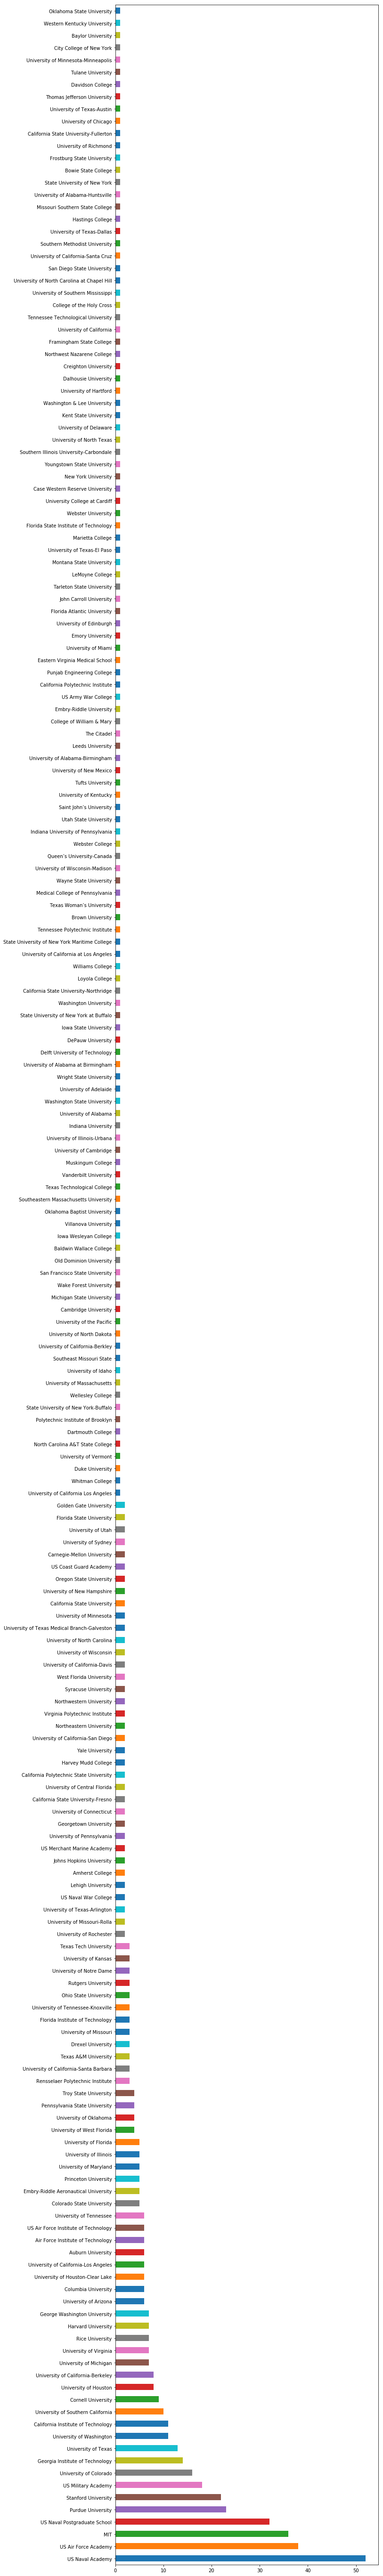

In [265]:
df['Alma Mater'].str.split('; ', expand=True).stack().value_counts().plot(kind = 'barh', figsize = (10, 100))

## 3. Определите количество военных и гражданских астронавтов.

In [266]:
print('военных: {}'.format(df[df['Military Rank'].notna()].shape[0]))
print('гражданских: {}'.format(df[df['Military Rank'].isna()].shape[0]))

военных: 207
гражданских: 150


## 4. Определите наиболее часто встречающееся среди астронавтов военное звание.

In [267]:
df['Military Rank'].value_counts().idxmax()

'Colonel'

## 5. Определите количество женщин среди астронавтов

In [268]:
df[df.Gender == 'Female'].shape[0]

50

## 6. Удалите из набора данных астронавтов, для которых не указан бакалавриат.

In [269]:
df.dropna(subset=['Undergraduate Major'])

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
5,Andrew M. Allen,1987.0,12.0,Retired,8/4/1955,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN
6,Joseph P. Allen,1967.0,6.0,Retired,6/27/1937,"Crawsfordsville, IN",Male,DePauw University; Yale University,Mathematics & Physics,Physics,NaN,NaN,2,313,2,12.0,"ST-5 (Columbia), STS 51-A (Discovery)",NaN,NaN
7,Scott D. Altman,1995.0,15.0,Retired,8/15/1959,"Lincoln, IL",Male,University of Illinois; US Naval Postgraduate ...,Aeronautical & Astronautical Engineering,Aeronautical Engineering,Captain,US Navy (Retired),4,1236,0,0.0,"STS-90 (Columbia), STS-106 (Atlantis), STS-109...",NaN,NaN
8,William A. Anders,1963.0,3.0,Retired,10/17/1933,Hong Kong,Male,US Naval Academy; Air Force Institute of Techn...,Nuclear Engineering,Nuclear Engineering,Major General,US Air Force Reserves (Retired),1,147,0,0.0,Apollo 8,NaN,NaN
9,Clayton C. Anderson,1998.0,17.0,Retired,2/23/1959,"Omaha, NE",Male,Hastings College; Iowa State University,Physics,Aerospace Engineering,NaN,NaN,2,4005,6,38.0,"STS-117/120 (Atlantis/Discovery), STS-131 (Dis...",NaN,NaN


## 7. Определите количество астронавтов, родом из Техаса.

In [270]:
def isFromTexas(bp):
    try:
        return bp.split(', ')[1] == 'TX'
    except IndexError:
        return False

df[df['Birth Place'].apply(lambda bp: isFromTexas(bp))].shape[0]

23

## 8. Определите количество миссий, в ходе выполнений которых погибли астронавты.

In [271]:
df['Death Mission'].dropna().drop_duplicates().shape[0]

3

## 9. Вычислите корреляцию Пирсона и Спирмена между признаками Gender и Missions. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [284]:
def convertMissions(m):
    return m.split(', ').__len__()

def convertGender(g):
    if g == 'Female': 
        return 0
    else:
        return 1



df_copy = df.dropna(subset=['Gender', 'Missions'])
df_genders = df_copy['Gender'].apply(lambda g: convertGender(g))
df_missions = df_copy['Missions'].apply(lambda m: convertMissions(m))

pearson_correlation, pearson_pvalue = stats.pearsonr(df_genders, df_missions)
print('Pearson:')
print('Correlation - ', pearson_correlation)
print('p-value - ', pearson_pvalue)

spearman_correlation, spearman_pvalue = stats.spearmanr(df_genders, df_missions)
print('\nSpearman:')
print('Correlation - ', spearman_correlation)
print('p-value - ', spearman_pvalue)

Pearson:
Correlation -  -0.0227979696244
p-value -  0.678039376618

Spearman:
Correlation -  -0.0241192424594
p-value -  0.660511834724


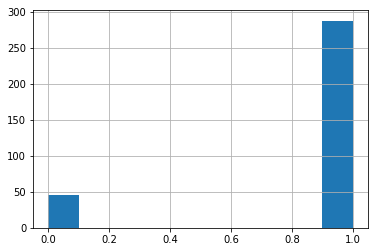

In [302]:
df_genders.hist()

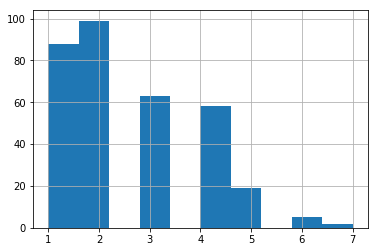

In [303]:
df_missions.hist()